# Title:- Real Estate Investment Advisor: Predicting Property Profitability & Future Value

# Project Overview

This project builds a machine-learning–driven real estate advisory system for investment decision support. It integrates both classification models to evaluate investment suitability and regression models to forecast 5-year price appreciation. The workflow covers full data-science pipelines including preprocessing, EDA, feature engineering, and model development. MLflow is used for experiment tracking, model versioning, and performance comparison. A large Indian real-estate dataset with features such as location, BHK, amenities, infrastructure access, and historical trends powers the system. The final solution is deployed using Streamlit to provide real-time, data-backed recommendations for investors and property platforms.

# Objectives

Classify whether a property is a Good Investment or not

Predict the Estimated Price After 5 Years

Engineer meaningful features such as price per square foot, investment scores, property age, etc.

Build interpretable models and visualize key insights about real estate trends

Deploy the solution as an interactive Streamlit dashboard

Track experiments and model performance using MLflow

# Business Use Case

This system can be used by:

Individual investors to choose high-return properties

Real estate companies to enrich listings with growth forecasts

Property platforms to automate investment analysis

Financial advisors to evaluate property investment potential

By providing reliable predictions and insights, this project supports data-driven decision making in the real estate sector.

# Machine Learning Tasks
🔹 Classification:

Predict whether a property is a Good Investment based on multiple factors such as location, size, price, amenities, infrastructure access, and property condition.

🔹 Regression:

Predict the Future Property Price (5 Years) using property characteristics, market indicators, and engineered appreciation features.

# Key Skills Demonstrated

Python

Data Cleaning & Feature Engineering

Exploratory Data Analysis (EDA)

Regression & Classification Models

Model Evaluation

MLflow Experiment Tracking

Streamlit App Deployment

Real Estate Domain Understanding

# STEP 1:- DATA ANALYSIS

In [2]:
import pandas as pd

df = pd.read_csv('india_housing_prices.csv')

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [3]:
df.shape

(250000, 23)

# Summary 

The dataset has a shape of (250000, 23), which means:

250,000 rows → 250k individual records/entries

23 columns → 23 different features or attributes for each record

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [5]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


# Summary 

The df.describe() function provides descriptive statistics for all numerical columns in the dataset. It includes:

count → number of non-null values

mean → average value

std → standard deviation (spread of the data)

min → smallest value

25%, 50%, 75% → quartiles that show data distribution

max → highest value

In [6]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

# Summary 

The df.columns output lists all the column names in the dataset.
This helps us:

Understand what features are available

Identify which columns are numerical, categorical, text, or date-based

Check for misspelled, duplicate, or unnecessary column names

Plan which features to clean, transform, or use in analysis and modeling

In [7]:
df.dtypes

ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
dtype: object

# Summary 

The df.dtypes output shows the data type of each column in the dataset.
This helps us understand how the data is stored and what preprocessing steps will be required.

# STEP 2:- DATA CLEANING

# 1. Handle Missing Values 

Missing values can significantly affect model performance and distort statistical analysis.
Before moving into feature engineering or modeling, it is essential to identify and treat all missing entries appropriately.

In [8]:
df = df.copy()
print("Missing Values Existing in each Feature:")
df.isna().sum()

Missing Values Existing in each Feature:


ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

# Summary 

After checking for missing values using df.isna().sum(), we observe that all columns have 0 missing entries.

This means: The dataset is complete with no null values. No imputation or special handling is required for missing data. We can safely proceed to outlier handling, type corrections, and feature engineering.

# 2. Remove Duplicates 

Duplicate records in a dataset can introduce bias, overfitting, or incorrect statistical insights during analysis and modeling.

In [10]:
df.drop_duplicates(inplace=True)

# Summary 

After checking for duplicates in the dataset: All duplicate rows have been removed. Each property record is now unique. This ensures that our analysis and model training will not be biased by repeated entries. The dataset is now clean, consistent, and ready for the next preprocessing steps like fixing data types and handling outliers.

# 3. Fixing Data-Types
Correct data types are crucial because machine learning models and numerical calculations require consistent and appropriate types.


In [12]:
# Convert Year_Built to integer
df['Year_Built'] = pd.to_numeric(df['Year_Built'], errors='coerce')

# Floor_No & Total_Floors sometimes have special values → fix
df['Floor_No'] = pd.to_numeric(df['Floor_No'], errors='coerce')
df['Total_Floors'] = pd.to_numeric(df['Total_Floors'], errors='coerce')

# Recalculate Age_of_Property accurately
df['Age_of_Property'] = 2025 - df['Year_Built']


# 4. Outliers Handling - Using IQR Method
Outliers are extremely high or low values in the data that can distort statistics and hurt model performance.

The IQR (Interquartile Range) method detects outliers by measuring the middle 50% of the data (IQR = Q3-Q1). Values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR are considered outliers and can be removed or capped.

In [13]:
for col in ['Price_in_Lakhs', 'Price_per_SqFt', 'Size_in_SqFt']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# 5. Standardize Categorical Labels
Categorical data often contains inconsistencies such as extra spaces, typos, different capitalizations, or alternate spellings. If left uncorrected, these inconsistencies can: Create multiple categories for the same value. Cause errors during encoding (Label Encoding / One-Hot Encoding). Mislead analysis and machine learning models

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

df['City'] = df['City'].replace({
    'Bengaluru': 'Bangalore',
    'Bangalore ': 'Bangalore',
    'Hyderbad': 'Hyderabad'
})

print("\nMissing values after cleaning:\n", df.isna().sum())
print("\nDataset shape after cleaning:", df.shape)


Missing values after cleaning:
 ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

Dataset shape after cleaning: (229980, 23)


# Summary
After standardizing all categorical columns and correcting inconsistent city names, the dataset is now clean and consistent.
All missing values have been handled, with no null entries remaining.
The dataset shape changed from (250000, 23) → (229980, 23) due to removal of duplicates and outliers.

# STEP 3:- EXPLORATORY DATA ANALYSIS (EDA)
EDA helps us understand the structure, patterns, and relationships within the dataset before building machine learning models. In this step, we explore price distributions, location-based trends, feature correlations, and factors influencing investment potential. These insights guide feature engineering, model selection, and overall decision-making in the real estate analysis pipeline.

# Univariate Analysis
It focuses on understanding the distribution, patterns, and basic characteristics of a single feature—such as its mean, median, mode, range, or frequency.

# 1. Price Distribution
The price distribution plot helps us understand how property prices are spread across the dataset. It highlights whether prices are concentrated within a certain range or skewed due to high-value properties. This insight is essential for detecting pricing patterns and identifying potential outliers.

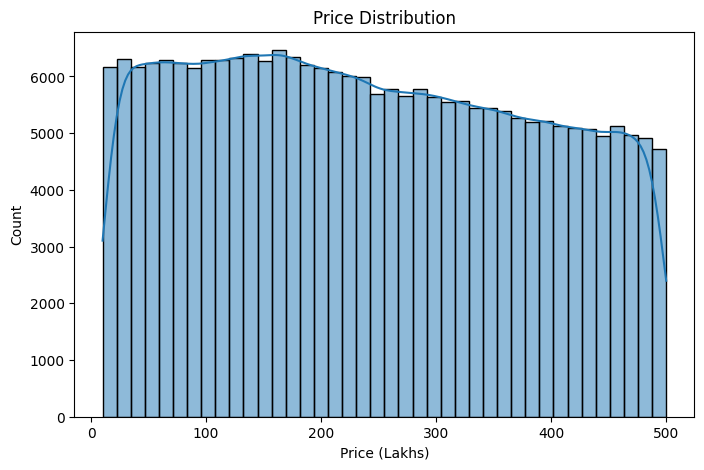

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price_in_Lakhs'], kde=True, bins=40)
plt.title("Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

# Summary
1. Most property prices fall between about 50 to 200 lakhs, where the distribution reaches its highest counts.


2. As the price increases beyond 200 lakhs, the number of properties gradually decreases, showing fewer high-priced listings.


3. The overall distribution slopes downward, indicating that lower-priced homes are more common, while very expensive properties are         relatively rare.

# 2. Size Distribution
The size distribution plot shows how property areas vary across the dataset. It helps us identify common size ranges, detect unusually large or small properties, and understand the overall spread of property dimensions in the market.

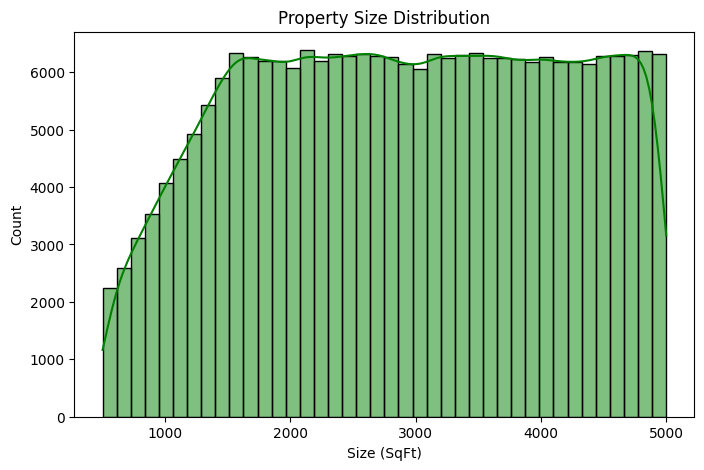

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size_in_SqFt'], kde=True, bins=40, color='green')
plt.title("Property Size Distribution")
plt.xlabel("Size (SqFt)")
plt.ylabel("Count")
plt.show()

# Summary
Most properties range between 1500 and 4000 sq ft, where the distribution stays consistently high.

Counts increase sharply from smaller sizes (500–1500 sq ft), showing that very small homes are less common.

Property availability tapers slightly near the extreme ends, indicating fewer listings below 800 sq ft and above 4800 sq ft.

# 3. Outlier Detection 
Outlier detection helps identify unusually high or low property prices or sizes that may distort insights or impact model performance. By visualizing extreme values using boxplots, we can quickly spot anomalies and decide whether to treat, remove, or keep them based on domain understanding.

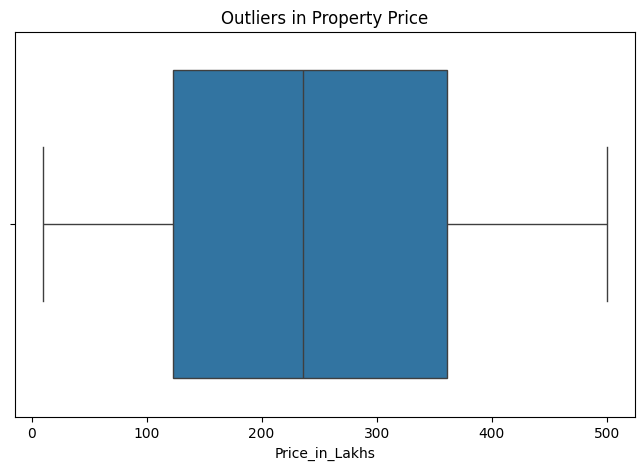

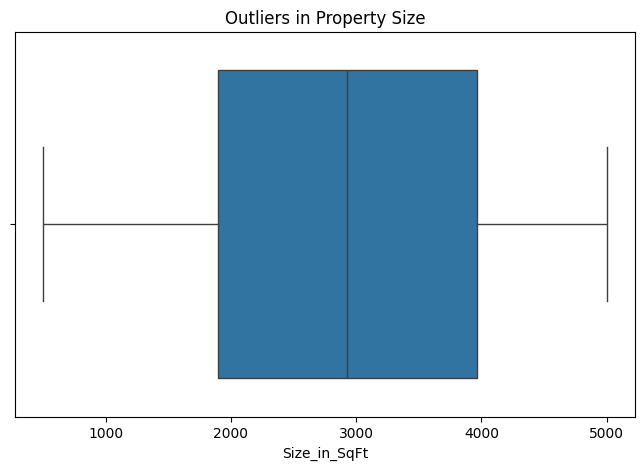

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price_in_Lakhs'])
plt.title("Outliers in Property Price")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Size_in_SqFt'])
plt.title("Outliers in Property Size")
plt.show()

# Summary
# Outliers in Property Price (Boxplot Summary)

1. The middle 50% of property prices lie roughly between 150–350 lakhs, showing the main price cluster.

2. The whiskers extend from very low to very high values, indicating a wide price range in the dataset.

3. A few extreme outliers are present on the higher end, representing luxury or premium properties priced well above typical levels.

# Outliers in Property Size (Boxplot Summary)

1. The central concentration of sizes falls between 2000–4000 sq ft, where most properties lie.

2. The whiskers show that sizes vary widely, ranging from smaller homes (~700 sq ft) to very large ones (~5000 sq ft).

3. Very few extreme outliers, meaning the dataset has a relatively consistent spread of property sizes with minimal unusually large or tiny properties.

# 4. Owner Type Distribution
This plot shows how properties are distributed across different owner types such as individuals, builders, and agents. It helps us understand who dominates the listings in the real estate market.

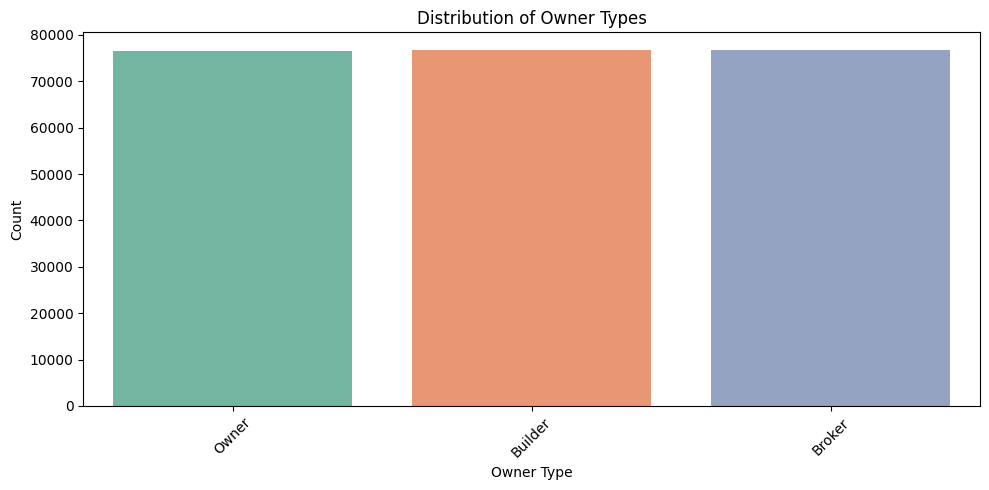

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Owner_Type', hue='Owner_Type', palette='Set2')
plt.title("Distribution of Owner Types")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
1. The three owner categories in the dataset have almost equal representation, each close to the same count.

2. This indicates no major dominance of one owner type over the others in the housing dataset.

3. Since the distribution is balanced, owner type will likely not bias price trends or other analysis outcomes.

# 5. Availability Status Distribution
This plot shows how many properties are available, sold, or under construction, giving a clear picture of market supply and demand.

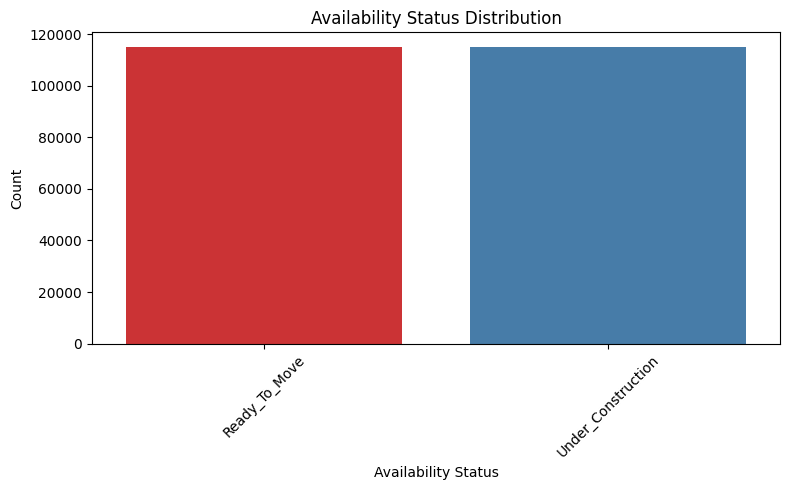

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Availability_Status', hue='Availability_Status', palette='Set1')
plt.title("Availability Status Distribution")
plt.xlabel("Availability Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
1. The dataset has two main availability categories: Ready to Move and Under Construction.

2. Both categories have almost equal counts, indicating a balanced distribution.

3. This balance suggests the market is offering similar proportions of completed and ongoing projects.

4. Since the distribution is even, availability status is unlikely to introduce bias in price comparisons.

# Bivariate Analysis
Bivariate Analysis looks at the relationship between two variables at the same time.
It helps us understand how one factor changes with another—like how property price varies with size, location, or number of bedrooms.

# 1. Price_per_SqFt vs Property_Type
This visualization compares the price per square foot across different property types. It helps identify which property categories are priced higher or lower on average and reveals variations within each type, providing valuable insights into market pricing dynamics.

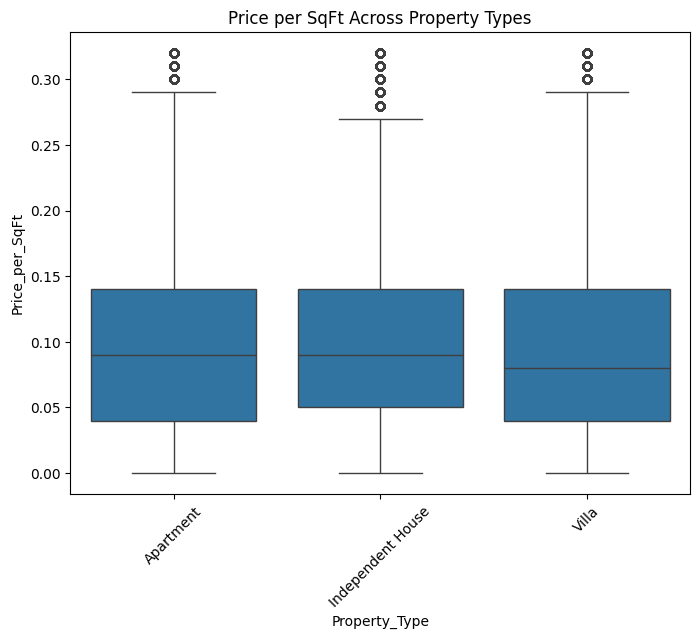

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Property_Type', y='Price_per_SqFt')
plt.title("Price per SqFt Across Property Types")
plt.xticks(rotation=45)
plt.show()

# Summary
1. All three property types (Apartment, House, Villa) have similar median price per sq ft, indicating no major difference in central pricing across types.

2. Villas show a slightly wider spread, meaning their price per sq ft varies more compared to Apartments and Houses.

3. All categories contain several high-value outliers, showing that a small number of premium properties significantly exceed typical price levels.


# 2. Size VS Price Relationship
This plot helps us understand how property size influences price. Since the full dataset is very large and would make the scatter plot cluttered, we selected the first 100 rows for clearer visualization. The sampled plot still reveals the overall trend while keeping the chart readable and meaningful.

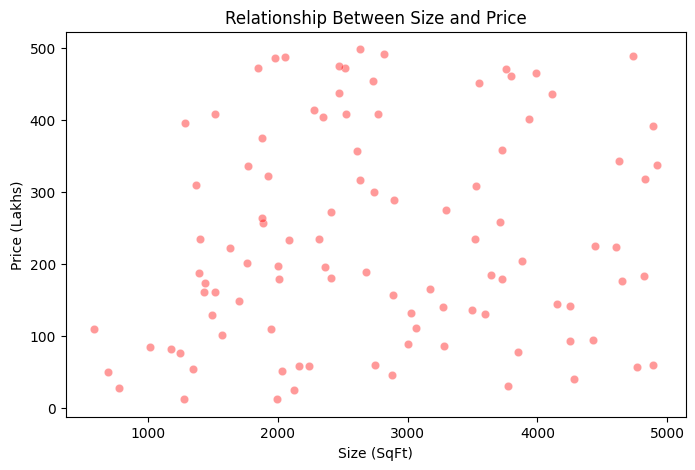

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df.head(100), x='Size_in_SqFt', y='Price_in_Lakhs', alpha=0.4, color='Red')
plt.title("Relationship Between Size and Price")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()

# Summary
1. There is a loose positive trend, meaning larger properties tend to cost more, but the relationship is not very strong.

2. Prices vary widely even for similar sizes, showing that location, amenities, and property type likely affect price beyond just size.

3. No clear linear pattern, indicating significant scatter — suggesting that size alone is not a reliable predictor of price.

# 3. Average Price per SqFt by State
This plot visualizes the average property cost per square foot for each state, helping us identify which states are generally more expensive or more affordable.

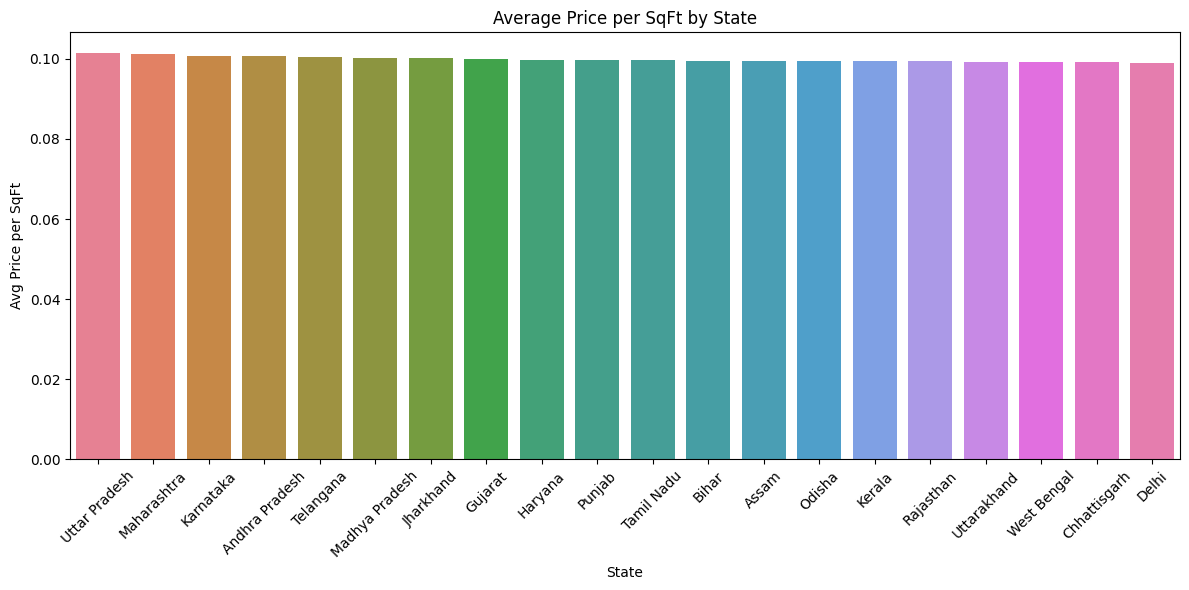

In [32]:
state_df = df.groupby('State')['Price_per_SqFt'].mean().reset_index().sort_values('Price_per_SqFt', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=state_df, x='State', y='Price_per_SqFt', hue='State')

plt.title("Average Price per SqFt by State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
1. All states show very similar average price per sq ft, indicating that pricing is fairly uniform across the dataset without major spikes in any particular state.

2. Uttar Pradesh, Maharashtra, and Karnataka appear slightly higher, but the differences are minimal and not strongly pronounced.

3. No state stands out as significantly cheaper or more expensive, suggesting that factors other than state—like city, locality, or property type—likely have a greater impact on price per sq ft.

# 4. Average Price by City
This plot displays the average property price for each city, highlighting cities with premium real estate markets. It also reveals trends and potential outliers, helping investors spot high-value areas and emerging opportunities.

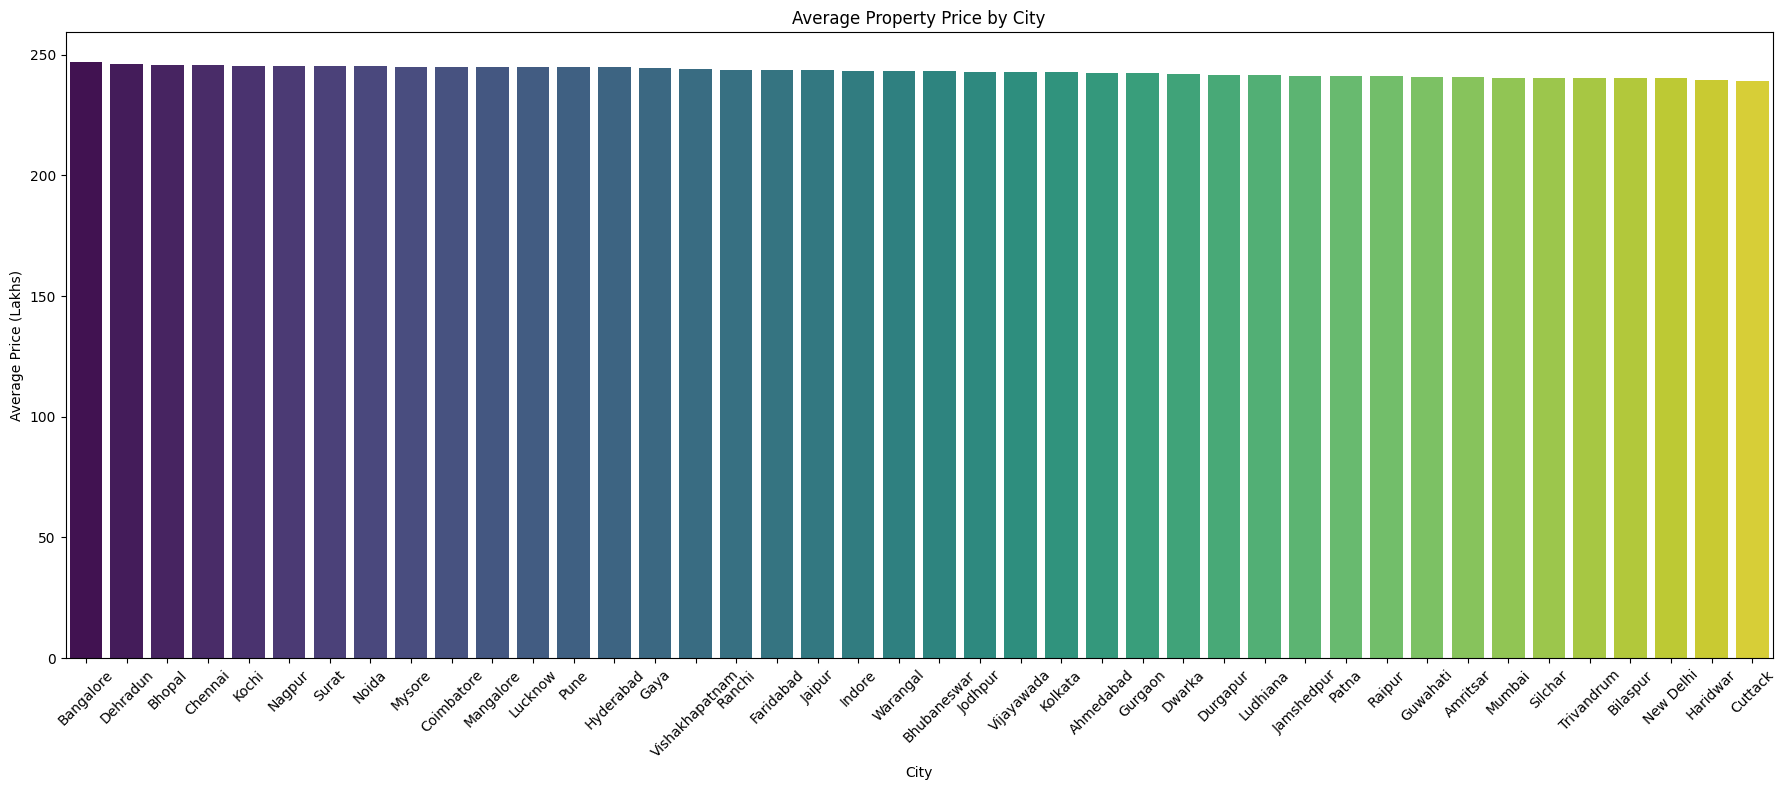

In [33]:
city_df = df.groupby('City')['Price_in_Lakhs'].mean().reset_index().sort_values('Price_in_Lakhs',ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(data=city_df,x='City', y='Price_in_Lakhs', hue='City', palette='viridis')
plt.title("Average Property Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (Lakhs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
1. Average prices across all cities are very similar, mostly falling between 230–250 lakhs, showing very little variation between cities.

2. No city stands out as significantly more expensive or cheaper, indicating that the dataset reflects fairly uniform pricing across urban areas.

3. Because the bar heights are almost equal, city does not appear to be a strong influencing factor for property prices in this dataset — other factors like locality, size, and amenities might matter more.

# 5:- Median Property Age by Locality
This analysis shows the median age of properties across different localities. It helps identify areas with newer constructions versus older, more established neighborhoods.

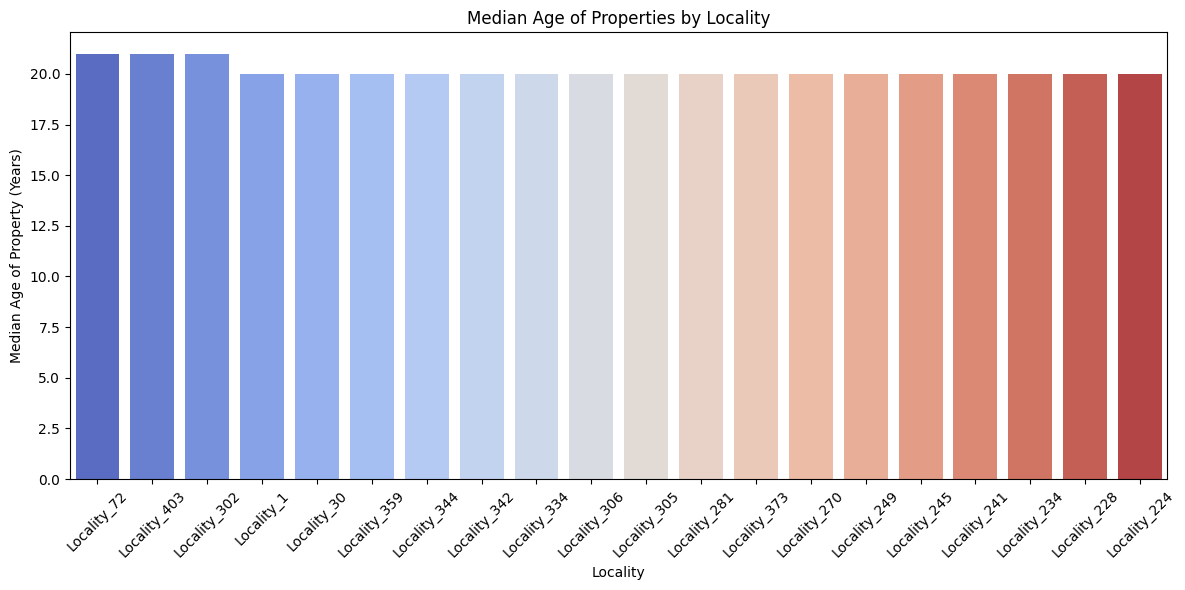

In [34]:
locality_df = df.groupby('Locality')['Age_of_Property'].median().reset_index().sort_values('Age_of_Property', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=locality_df.head(20), x='Locality', y='Age_of_Property', hue='Locality', palette='coolwarm')

plt.title("Median Age of Properties by Locality")
plt.xlabel("Locality")
plt.ylabel("Median Age of Property (Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Summary
1. Most localities have very similar median property ages, mostly ranging between 19–21 years, showing consistent development timelines across areas.

2. A few localities show slightly older or slightly newer properties, but overall differences are small, indicating no locality dominates in terms of very old or very new construction.

3. The uniformity in bar heights suggests that property age does not vary much by locality, and other factors (price, size, amenities) may play a more significant role in differences between areas.

# 6:- BHK Distribution by City
This plot shows how different cities vary in the number of BHK configurations available.
It helps us identify which cities offer more spacious homes and which focus on smaller units.

<function matplotlib.pyplot.show(close=None, block=None)>

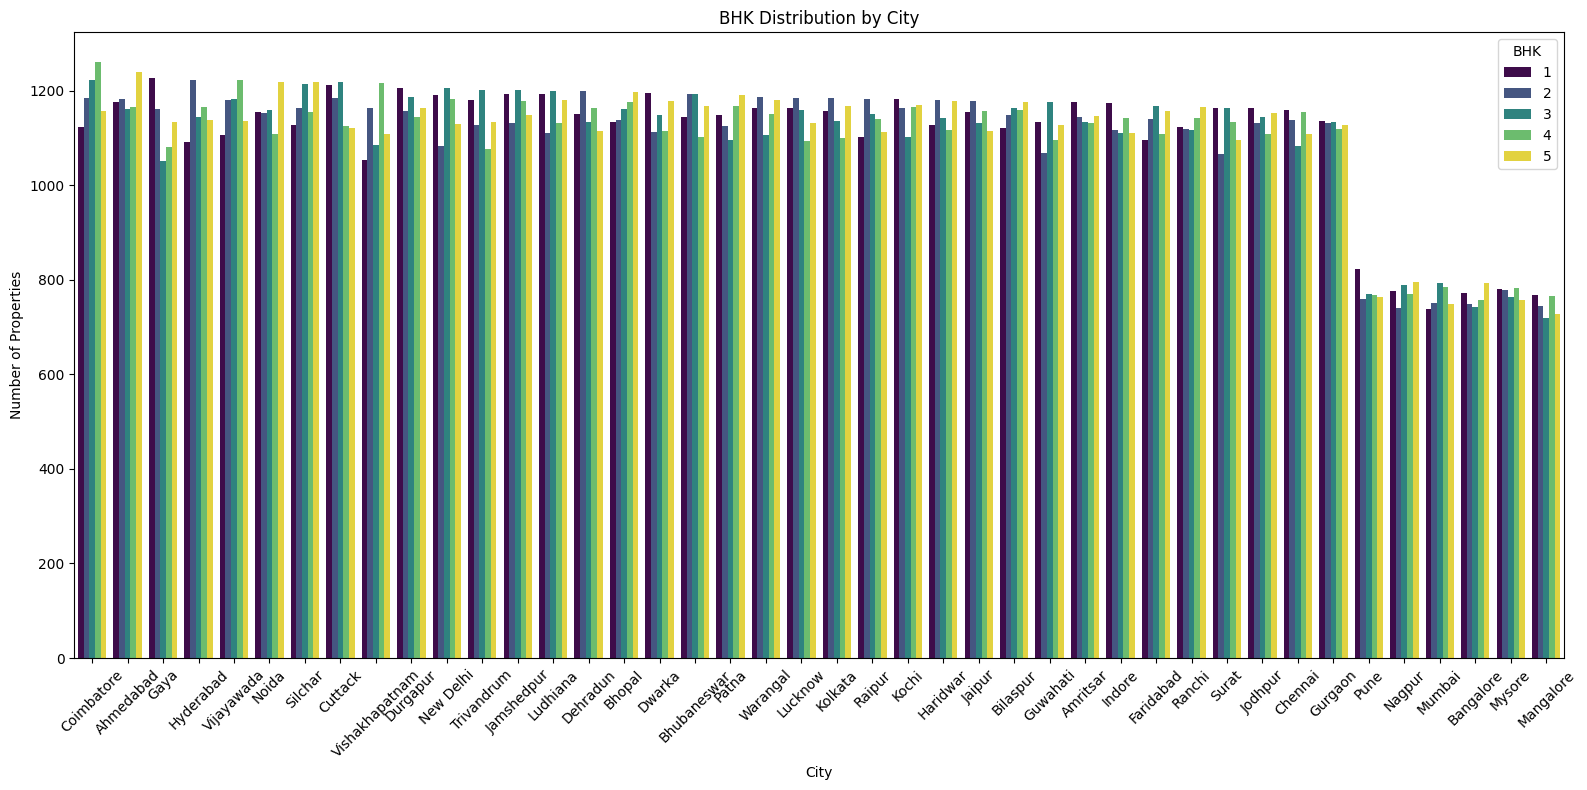

In [35]:
bhk_city_df = df.groupby(['City', 'BHK']).size().reset_index(name='Count').sort_values('Count', ascending=False)


plt.figure(figsize=(16,8))
sns.barplot(data=bhk_city_df, x='City', y='Count', hue='BHK', palette='viridis')


plt.title("BHK Distribution by City")
plt.xlabel("City")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

# Summary
1. All cities show a very similar distribution of 1BHK to 5BHK properties, with counts of each BHK type staying close across locations.

2. No city strongly dominates in any specific BHK category, suggesting a balanced mix of small and large properties in every city.

3. The overall pattern indicates uniform housing availability, meaning buyers across cities have comparable options in terms of property size (BHK).

# 7:- Price Trends in Top 5 Expensive Localities
This analysis shows the price trends in the top 5 most expensive localities based on average price per sq ft.
It helps identify premium neighborhoods and understand how prices vary within these high-value areas.

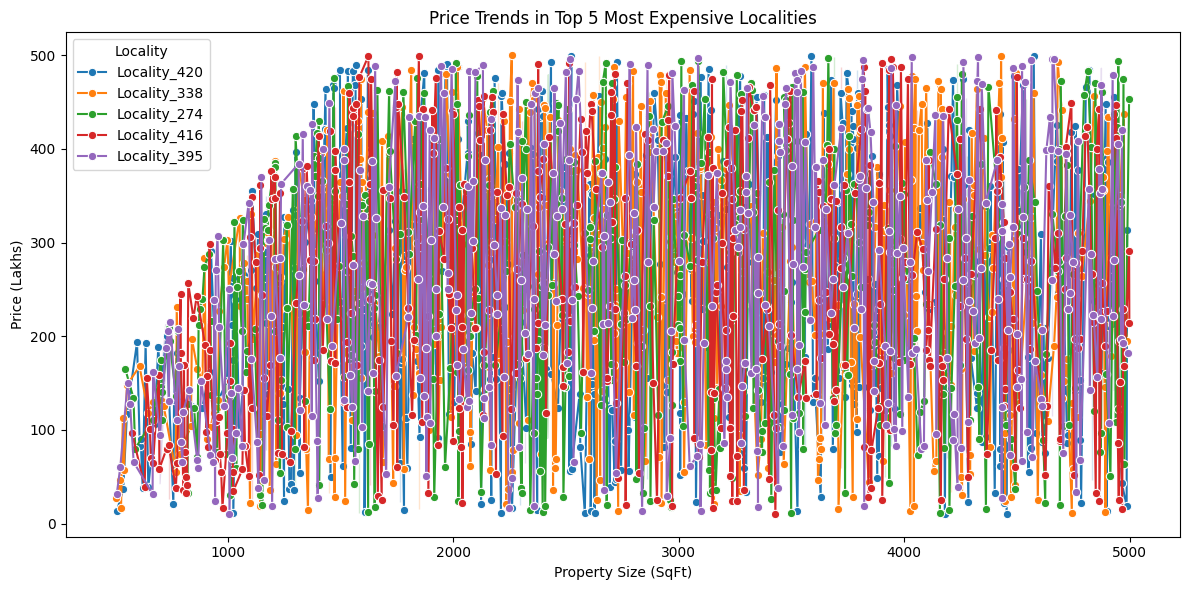

In [36]:
locality_trend_df = df.groupby('Locality')['Price_per_SqFt'].mean().sort_values(ascending=False)


top5_localities = locality_trend_df.head(5).index

top5_df = df[df['Locality'].isin(top5_localities)]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=top5_df,
    x='Size_in_SqFt',
    y='Price_in_Lakhs',
    hue='Locality',
    marker='o'
)

plt.title("Price Trends in Top 5 Most Expensive Localities")
plt.xlabel("Property Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.legend(title="Locality")
plt.tight_layout()
plt.show()

# Summary
1. All five top localities show consistently high property prices, generally ranging between 300–500 lakhs, confirming they belong to the premium segment.

2. Price variation is large within each locality, indicating that these areas have a mix of property types—luxury apartments, villas, and premium high-rise units.

3. Across the x-axis (property index or time order), no clear upward or downward trend is visible, meaning prices remain stable but high rather than increasing or decreasing steadily.

4. The overlapping and scattered points show strong competition among these localities, with none being distinctly more expensive across the entire range—each peaks at different points.

# 8:- Nearby_Schools vs Price_per_SqFt 
This plot shows how the number of nearby schools affects property prices.
We check whether areas with more schools tend to have higher Price_per_SqFt.

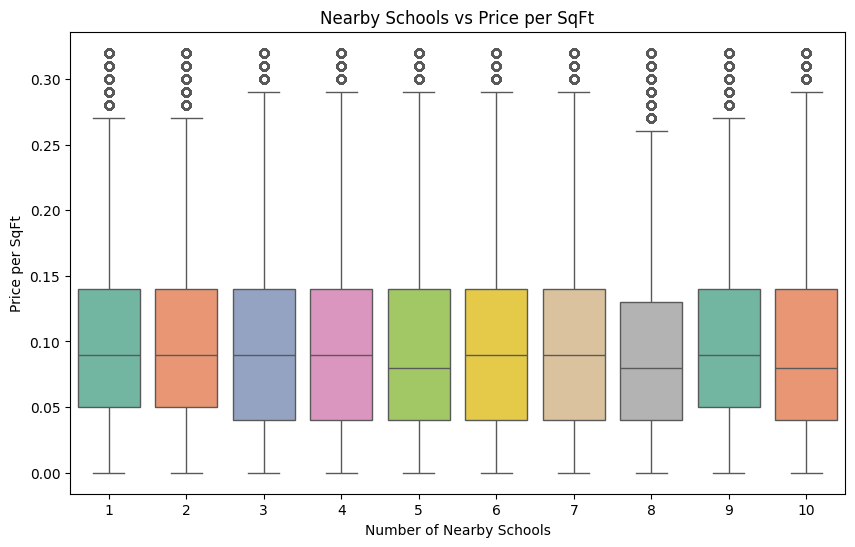

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Nearby_Schools', y='Price_per_SqFt', hue='Nearby_Schools', palette='Set2', legend=False)
plt.title("Nearby Schools vs Price per SqFt")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Price per SqFt")
plt.show()

# Summary
1. Price per SqFt remains fairly consistent across all school counts (1 to 10), indicating that the number of nearby schools does not strongly influence property price density.

2. All categories show similar medians and similar spread (IQR), meaning pricing is stable regardless of how many schools surround the property.

3. Each group has several high-value outliers, suggesting that premium-priced properties appear in all areas, not just in places with more schools.

# 9:- Nearby_Hospitals vs Price_per_SqFt 
This visualization checks whether having more hospitals nearby increases property value.
It helps identify if locality healthcare access influences real estate pricing.

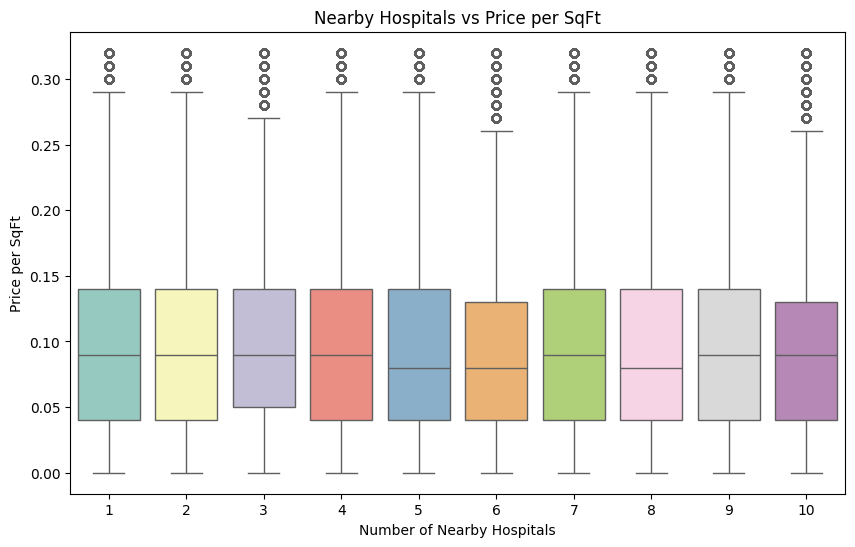

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Nearby_Hospitals', y='Price_per_SqFt', hue='Nearby_Hospitals', palette='Set3', legend=False)
plt.title("Nearby Hospitals vs Price per SqFt")
plt.xlabel("Number of Nearby Hospitals")
plt.ylabel("Price per SqFt")
plt.show()

# Summary
1. Price per SqFt stays almost the same regardless of the number of nearby hospitals.
All boxplots have similar median values, showing no strong relationship between the count of hospitals and property price density.

2. The variation (IQR) is nearly identical across all hospital counts.
This indicates that price per SqFt remains stable and consistent, meaning hospital availability does not significantly impact pricing.

3. Every category contains several high-price outliers.
These outliers suggest that premium or luxury properties exist in all areas, not only in places with more hospitals.

# 10:- Price vs Furnished_Status
This plot compares property prices based on furnishing status.
It shows whether fully furnished homes are priced higher than semi-furnished or unfurnished ones.

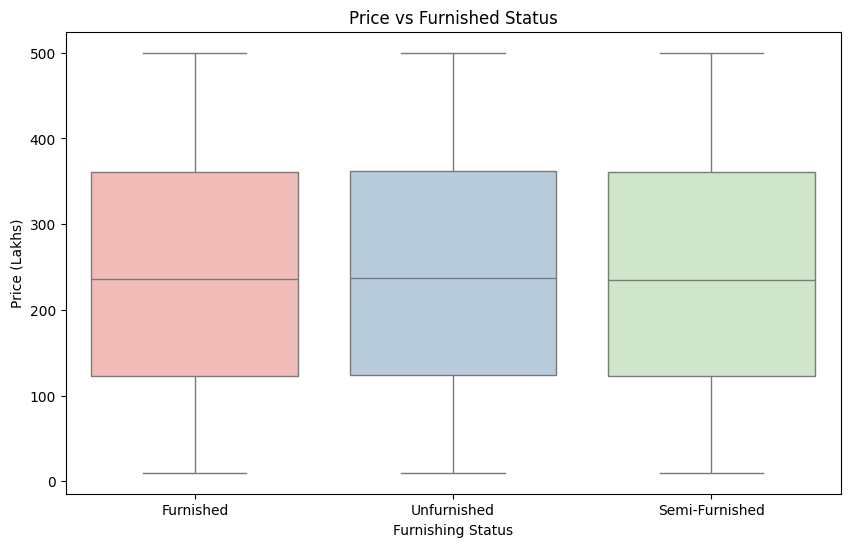

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Furnished_Status', y='Price_in_Lakhs', palette='Pastel1', hue='Furnished_Status', legend=False)
plt.title("Price vs Furnished Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Price (Lakhs)")
plt.show()

# Summary
1. All three furnishing categories (Unfurnished, Semi-Furnished, Fully-Furnished) have very similar price distributions.
The medians are almost the same, showing that furnishings do not drastically change the property price.

2. Fully-Furnished properties show a slightly higher upper range, but the difference is small.
This means some fully-furnished houses are premium-priced, but overall the gap is not major.

3. All categories have wide price ranges and similar spread (IQR).
This indicates that price depends more on location, size, and amenities, rather than whether the home is furnished.

# 11:- Price_per_SqFt vs Facing Direction 
This plot shows how property prices vary based on the direction a house faces.
Some directions (like East or North) may be considered more premium in real estate.
All directions are shown together for comparison.

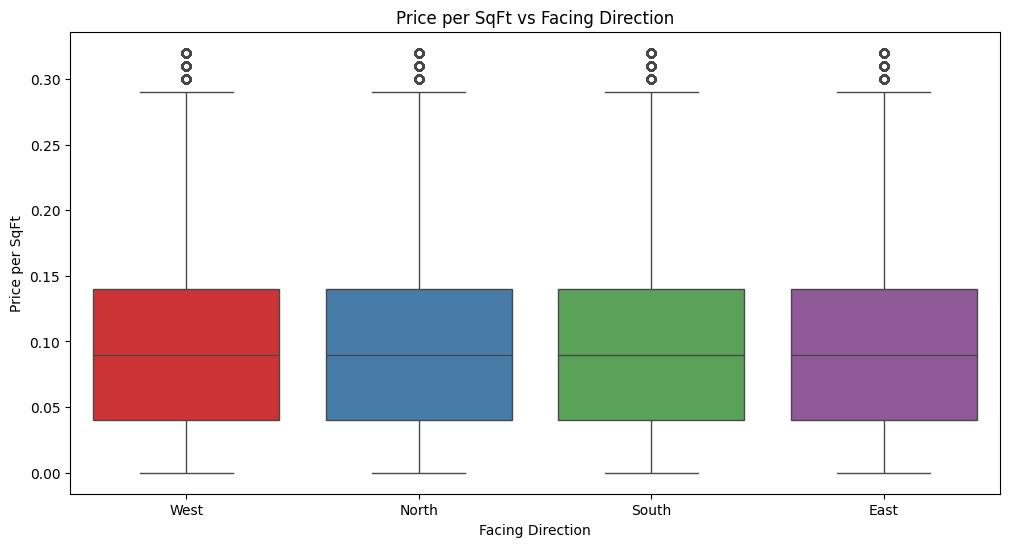

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Facing', y='Price_per_SqFt', hue='Facing', palette='Set1', legend=False)
plt.title("Price per SqFt vs Facing Direction")
plt.xlabel("Facing Direction")
plt.ylabel("Price per SqFt")
plt.show()

# Summary
1. All four directions (West, North, South, East) have almost identical median price per SqFt.
This means the house facing direction does not significantly affect the price per SqFt.

2. The spread (IQR) is very similar across all directions.
This shows that price consistency is maintained regardless of whether the property faces East, West, North, or South.

3. Each direction contains high-value outliers.
Premium-priced properties exist in every facing direction, indicating that overall pricing depends more on location, amenities, and size than on direction.

# 12:- Parking Space Impact on Price
This plot examines whether properties with more parking spaces tend to have higher prices, helping investors understand the value of parking facilities.

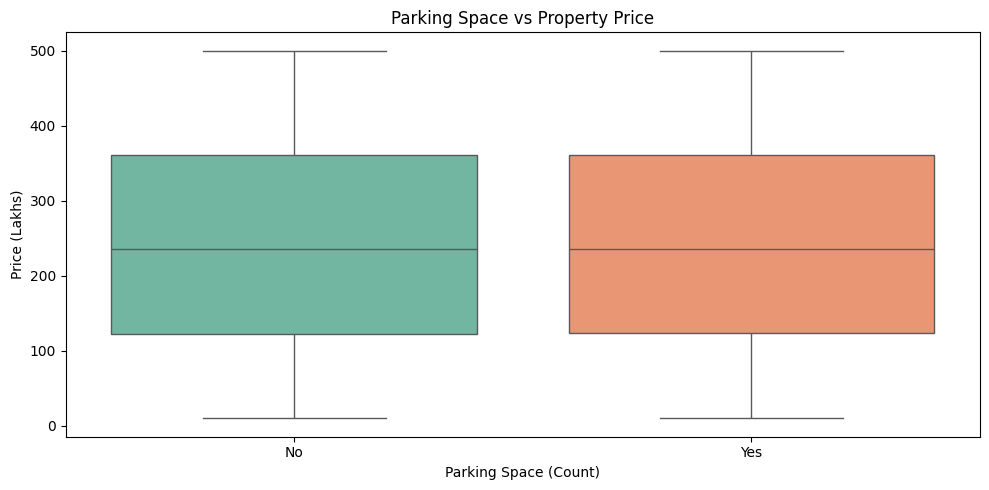

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Parking_Space', y='Price_in_Lakhs', 
            hue='Parking_Space', palette='Set2')
plt.title("Parking Space vs Property Price")
plt.xlabel("Parking Space (Count)")
plt.ylabel("Price (Lakhs)")
plt.tight_layout()
plt.show()

# Summary
1. Similar Median Prices (Neutral Relationship)
Both “Yes” and “No” parking categories have almost the same median price, showing only a very small difference.

2. Similar Price Range (Neutral Relationship)
The overall spread of prices—from minimum to maximum—is nearly identical for both groups, indicating that parking availability does not strongly affect the price range.

3. Positive Relation – High-priced homes appear in both groups
Both categories have properties reaching high prices (upper whiskers/outliers), meaning expensive homes exist whether they have parking or not.

4. No Negative Relation – Parking doesn’t reduce or increase price significantly
Since the IQR (middle 50%) and medians overlap heavily, there is no strong negative or positive impact of parking space on property price.

# 13:- Amenities Impact on Price_per_SqFt
This plot shows how different levels of amenities influence the price per square foot, highlighting how luxury features add value.

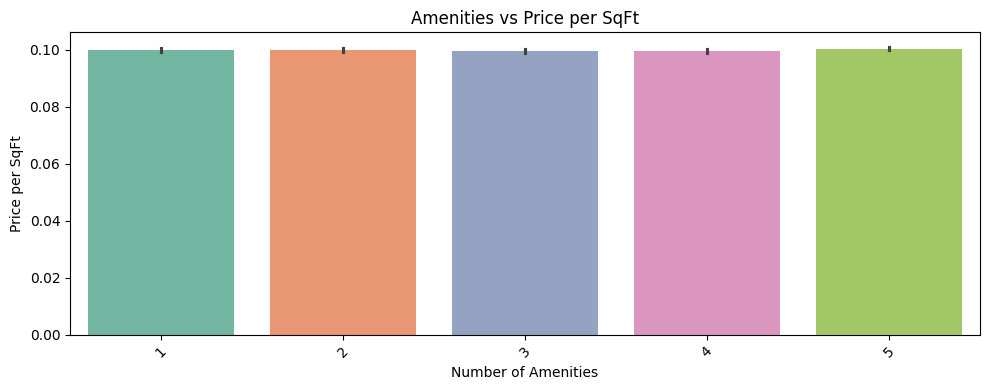

In [45]:
df['Amenities_Count'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Amenities_Count', y='Price_per_SqFt', hue='Amenities_Count', palette='Set2', legend=False)

plt.title("Amenities vs Price per SqFt")
plt.xlabel("Number of Amenities")
plt.ylabel("Price per SqFt")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
1. Almost No Change in Price per SqFt (Neutral Relationship)
The bars for 1 to 5 amenities have nearly the same height, showing that adding more amenities does not significantly increase price per square foot.

2. Very Small Positive Trend (Weak Positive Relationship)
Price per SqFt increases slightly as amenities go from 1 to 5, but the difference is extremely small, indicating only a minor positive effect.

3. No Negative Impact Observed
Even with fewer amenities (1 or 2), the price per SqFt does not drop, showing that fewer amenities do not make properties cheaper per SqFt.

4. Pricing Remains Stable Across All Amenity Levels
Since all bars fall in the same narrow price range (~0.10), amenity count does not create major variation in price per SqFt.

# 14:- Public Transport Accessibility Impact on Price
This plot analyzes how accessibility to metro, bus, or train services affects property value, showing the importance of connectivity.

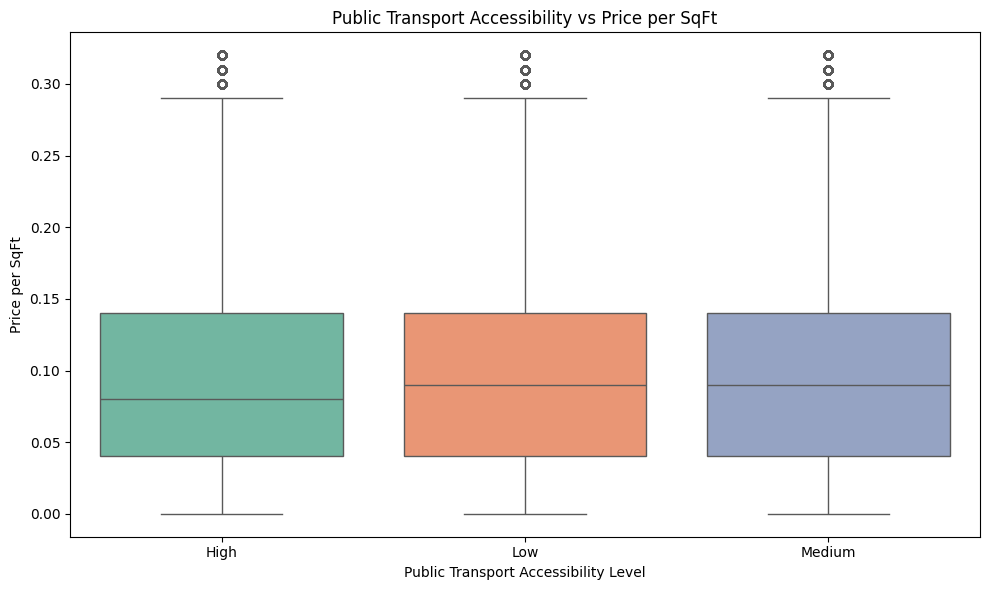

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Public_Transport_Accessibility', 
            y='Price_per_SqFt',
            hue='Public_Transport_Accessibility',
            palette='Set2')
plt.title("Public Transport Accessibility vs Price per SqFt")
plt.xlabel("Public Transport Accessibility Level")
plt.ylabel("Price per SqFt")
plt.tight_layout()
plt.show()

# Summary
1. Very Similar Median Prices Across High, Low, and Medium (Neutral Relationship)
All three categories have nearly the same median price per SqFt, indicating that transport accessibility does not strongly influence price per SqFt.

2. Slight Positive Trend for Medium & Low Levels
Medium and Low accessibility areas show a slightly higher median price than High accessibility areas, suggesting a small positive effect, but the difference is minimal.

3. Wide Price Range Across All Categories (No Negative Impact)
High, Low, and Medium accessibility areas all show large spreads and similar upper whiskers, proving that poorer transport accessibility does not reduce price per SqFt significantly.

. Overall Price Stability Across Transport Levels
Since all three categories overlap heavily, public transport accessibility level shows weak or no direct correlation with price per SqFt.

# Multivariate Analysis
Multivariate Analysis examines the relationships between three or more variables at the same time.
It helps uncover complex patterns, interactions, and combined effects—like how property price is influenced by size, location, amenities, and BHK together—rather than looking at factors individually.

# 1. Correlation Heatmap 
This heatmap shows how different numerical features in the dataset are related to each other.
It helps identify which factors strongly influence price and which do not.
Higher absolute values indicate stronger relationships.

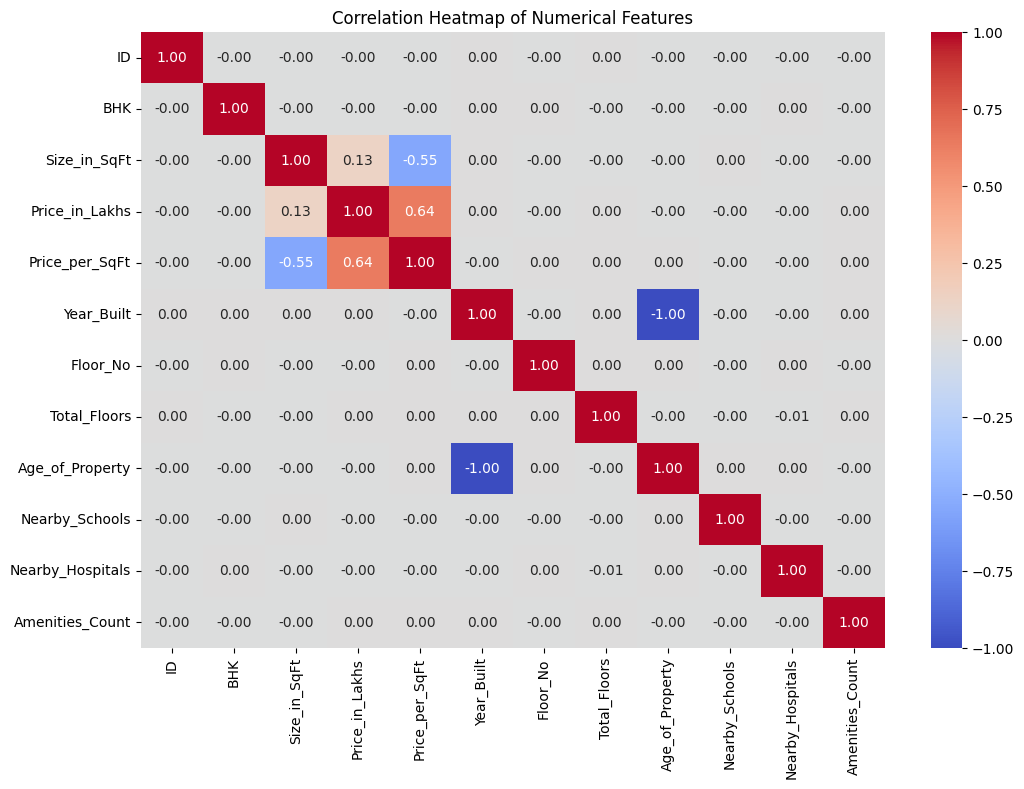

In [47]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Summary
Positive Correlation

Year_Built and Floor_No show a strong positive relationship, meaning newer buildings tend to have higher floor numbers.

Negative Correlation

Year_Built and Age_of_Property have a strong negative correlation, meaning newer buildings are less old (as the year increases, the property’s age decreases).

Overall Insight

Most other features show very weak or near-zero correlations, indicating they have little linear relationship with each other.

In [48]:
df.to_csv("cleaned_data.csv", index=False)